## Import packages and Load Data

In [1]:
import re
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_sentences(filename):
    sentences = []
    with open(filename, 'r', encoding='utf-8') as file:
        data = file.readlines()
        for d in data:
            if d.startswith('~'):
                d = d[1:].strip()
                tokens = d.split()
                sentences.append(tokens)
    return sentences

# Function to load human data from MaintNorm dataset
def load_maintnorm_sentences(file_path):
    dirty_sentences = []
    clean_sentences = []
    current_dirty = []
    current_clean = []
    pattern = r'[A-Za-z]{2}\d{4}-'
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:  # Empty line means a new sentence
                if current_dirty and current_clean:
                    dirty_sentences.append(' '.join(current_dirty))
                    clean_sentences.append(' '.join(current_clean))
                    current_dirty = []
                    current_clean = []
            else:
                parts = line.split('\t')
                if len(parts) > 1:
                    dirty, clean = parts[0], parts[1]
                    if not clean in ['<id>', '-']:
                        dirty = re.sub(pattern, '', dirty)
                        current_dirty.append(dirty.lower().strip())
                    current_clean.append(clean.lower())
    return dirty_sentences, clean_sentences

# Synthetic data
after_tokens = load_sentences('../Generate/mwo_sentences/log.txt')

with open('../Evaluation/Turing1/synthetic_generate_v1.txt', 'r', encoding='utf-8') as file:
    turing1 = [line.strip() for line in file.readlines()]
    turing1_tokens = [line.split() for line in turing1]
    
with open('../Evaluation/Turing2/synthetic_generate_v2.txt', 'r', encoding='utf-8') as file:
    turing2 = [line.strip() for line in file.readlines()]
    turing2_tokens = [line.split() for line in turing2]

with open('../Generate/mwo_sentences/synthetic.csv', 'r', encoding='utf-8') as file:
    syn = csv.reader(file)
    syn = [row[0] for row in syn]
    syn_tokens = [line.split() for line in syn]

# Human data
with open('../data/MaintIE/gold_release.json', 'r', encoding='utf-8') as file:
    gold_data = json.load(file)

with open('../data/MaintIE/silver_release.json', 'r', encoding='utf-8') as file:
    silver_data = json.load(file)

_, train_clean = load_maintnorm_sentences('../data/MaintNorm/train.norm')
_, test_clean = load_maintnorm_sentences('../data/MaintNorm/test.norm')
_, val_clean = load_maintnorm_sentences('../data/MaintNorm/val.norm')
maintnorm_data = list(set(train_clean + test_clean + val_clean)) # remove duplicates
maintnorm_tokens = [line.split() for line in maintnorm_data]

In [3]:
# Print number of tokens in the data
def sentence_tokens_analysis(data, data_name):
    """ Analyse the number of tokens in the maintie data. """
    min_tokens = 1000 # Minimum number of tokens
    max_tokens = 0    # Maximum number of tokens
    sum_tokens = 0    # Sum of tokens

    for tokens in data:
        if len(tokens) > max_tokens:
            max_tokens = len(tokens)
        if len(tokens) < min_tokens:
            min_tokens = len(tokens)
        sum_tokens += len(tokens)

    # Average number of tokens
    avg_tokens = round(sum_tokens / len(data), 2)
    
    df = pd.DataFrame({"Minimum": [min_tokens], 
                       "Maximum": [max_tokens], 
                       "Average": [avg_tokens]})
    print(f"{data_name} Tokens Count")
    print(df.to_string(index=False))
    print()
    return (min_tokens, max_tokens, avg_tokens)

# Print number of tokens in the maintie data
def maintie_tokens_analysis(maintie_data, data_name):
    """ Analyse the number of tokens in the maintie data. """
    min_tokens = 1000 # Minimum number of tokens
    max_tokens = 0    # Maximum number of tokens
    sum_tokens = 0    # Sum of tokens

    for data in maintie_data:
        tokens = data['tokens']
        if len(tokens) > max_tokens:
            max_tokens = len(tokens)
        if len(tokens) < min_tokens:
            min_tokens = len(tokens)
        sum_tokens += len(tokens)

    # Average number of tokens
    avg_tokens = round(sum_tokens / len(maintie_data), 2)
    
    df = pd.DataFrame({"Minimum": [min_tokens], 
                       "Maximum": [max_tokens], 
                       "Average": [avg_tokens]})
    print(f"{data_name} Tokens Count")
    print(df.to_string(index=False))
    print()
    return (min_tokens, max_tokens, avg_tokens)

def get_average_length(data):
    avg_min, avg_max, avg_avg = 0, 0, 0
    for d in data:
        avg_min += d[0]
        avg_max += d[1]
        avg_avg += d[2]
    avg_min /= len(data)
    avg_max /= len(data)
    avg_avg /= len(data)
    return (avg_min, avg_max, avg_avg)

# Print the number of tokens in the synthetic data
# before_lengths = synthetic_tokens_analysis(before_tokens, "Before Fixing")
# turing1_lengths = synthetic_tokens_analysis(turing1_tokens, "Turing Test V1")
after_lengths = sentence_tokens_analysis(after_tokens, "After Fixing")
turing2_lengths = sentence_tokens_analysis(turing2_tokens, "Turing Test V2")
syn_lengths = sentence_tokens_analysis(syn_tokens, "Synthetic Data")
maintnorm_lengths = sentence_tokens_analysis(maintnorm_tokens, "MaintNorm Clean")
gold_lengths = maintie_tokens_analysis(gold_data, "MaintIE Gold")
silver_lengths = maintie_tokens_analysis(silver_data, "MaintIE Silver")

# Average human and synthetic token distribution
print(f"Total human sentences pooled: {len(gold_data) + len(silver_data) + len(maintnorm_tokens)}")
print(f"Total synthetic sentences pooled: {len(after_tokens) + len(turing2_tokens) + len(syn_tokens)}")
human_lengths = get_average_length([gold_lengths, silver_lengths, maintnorm_lengths])
synthetic_lengths = get_average_length([after_lengths, turing2_lengths, syn_lengths])

After Fixing Tokens Count
 Minimum  Maximum  Average
       2       10     5.09

Turing Test V2 Tokens Count
 Minimum  Maximum  Average
       2        9     4.84

Synthetic Data Tokens Count
 Minimum  Maximum  Average
       2        9     4.88

MaintNorm Clean Tokens Count
 Minimum  Maximum  Average
       1       14     5.66

MaintIE Gold Tokens Count
 Minimum  Maximum  Average
       2       12     5.69

MaintIE Silver Tokens Count
 Minimum  Maximum  Average
       1       13     5.37

Total human sentences pooled: 17328
Total synthetic sentences pooled: 10942


## Token Distribution

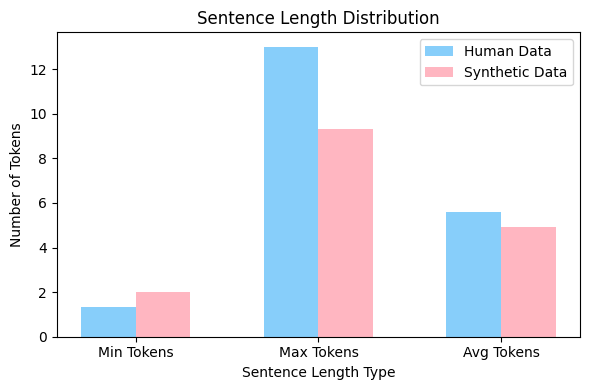

In [4]:
# Labels for the x-axis (min, max, avg)
labels = ['Min Tokens', 'Max Tokens', 'Avg Tokens']

# Set up the bar chart
x = np.arange(len(labels))  # The label locations
width = 0.3  # The width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Plot each dataset's values with an offset to group them
human = ax.bar(x - width/2, human_lengths, width, label='Human Data', color='lightskyblue')
synthetic = ax.bar(x + width/2, synthetic_lengths, width, label='Synthetic Data', color='lightpink')

# Add labels, title, and legend
ax.set_xlabel('Sentence Length Type')
ax.set_ylabel('Number of Tokens')
ax.set_title('Sentence Length Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Find LLM Deviations

In [5]:
from word_forms.word_forms import get_word_forms

# Function to parse the text and extract object, event, and sentences
def parse_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        input_text = file.read()
    sections = re.split(r"={40}", input_text.strip())
    data = []

    for section in sections:
        if not section.strip():
            continue
        # Extract object, event, and sentences using regex
        object_match = re.search(r"Object:\s*(.+)", section)
        event_match = re.search(r"Event:\s*(.+)", section)
        sentences = re.findall(r"~\s*(.+)", section)

        if object_match and event_match:
            obj = object_match.group(1).strip()
            event = event_match.group(1).strip()
            data.append({'object': obj, 'event': event, 'sentences': sentences})

    return data

from word_forms.word_forms import get_word_forms

synonyms = {
    "need": "require",
    "require": "need",
    "replace": "change out",
    "change out": "replace",
}

def get_all_forms(token):
    """Retrieve all word forms for a token, including its synonyms."""
    token_forms = get_word_forms(token)
    all_forms = {form for forms in token_forms.values() for form in forms}
    all_forms.add(token)  # Add the original token
    return all_forms

def token_in_sentence(token, sentence):
    """Check if token, its forms, or any of its synonyms appear in the sentence."""
    # Start with checking the token itself and its forms
    all_forms = get_all_forms(token)

    # Check for synonyms and their forms if token has synonyms
    new_forms = set()
    for form in all_forms:
        if form in synonyms:
            new_forms.update(get_all_forms(synonyms[form]))
    all_forms.update(new_forms)
    
    # Check if any form is present in the sentence
    return any(form in sentence for form in all_forms)


# Function to filter sentences without object and event
def check_sentences(data):
    count = 0
    total = 0
    for section in data:
        object_tokens = section['object'].split()
        event_tokens = section['event'].split()
        sentences = section['sentences']

        for sentence in sentences:
            total += 1
            for token in object_tokens:
                if not token_in_sentence(token, sentence):
                    count += 1
                    print(f"{sentence:<55} - missing {section['object']}")
            for token in event_tokens:
                if not token_in_sentence(token, sentence):
                    count += 1
                    print(f"{sentence:<55} - missing {section['event']}")
    return count, total

data = parse_text('../mwo_sentences/log.txt')
count, total = check_sentences(data)
print(f"{count} out of {total} sentences missing object or event")

replace leaking oil cooler hose                         - missing leaking fuel
replace leaking pedestal seals                          - missing leaking oil
replace cooler pump hose                                - missing needs replaced
centrifuge filter is leaking oil                        - missing leaking centrifugal oil filter
leaking centrifugal oil filter found                    - missing centrifuge filter
centrifuge filter is leaking                            - missing leaking centrifugal oil filter
centrifuge filter is leaking                            - missing leaking centrifugal oil filter
leaking centrifuge oil filter                           - missing leaking centrifugal oil filter
centrifuge filter has leaking oil                       - missing leaking centrifugal oil filter
centrifuge filter leaking oil                           - missing leaking centrifugal oil filter
oil filter on centrifuge is leaking                     - missing leaking centrifugal oil filter